In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pdf = pd.read_csv("../DataSets/weather-stations.csv")
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)




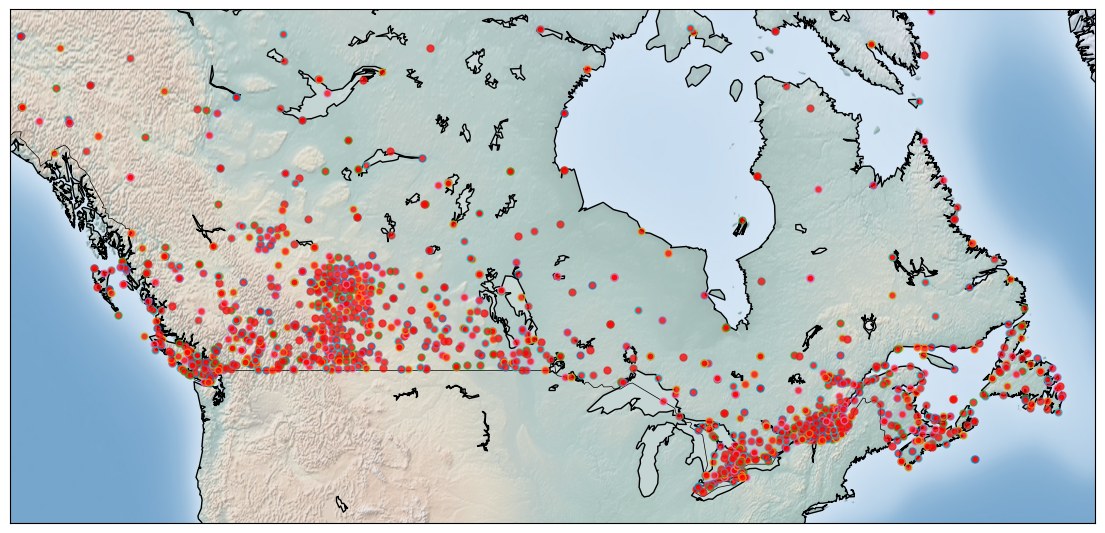

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()

# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        
xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

In [7]:

from sklearn.preprocessing import StandardScaler
# we need only locations !
clust_ds = pdf[["xm","ym"]]
clust_ds = np.nan_to_num(clust_ds)
clust_ds = StandardScaler().fit_transform(clust_ds)



In [8]:

from sklearn.cluster import DBSCAN
db = DBSCAN(
    eps=0.5,
    min_samples=15,
).fit(clust_ds)

Estimated number of clusters: 1
Estimated number of noise points: 38


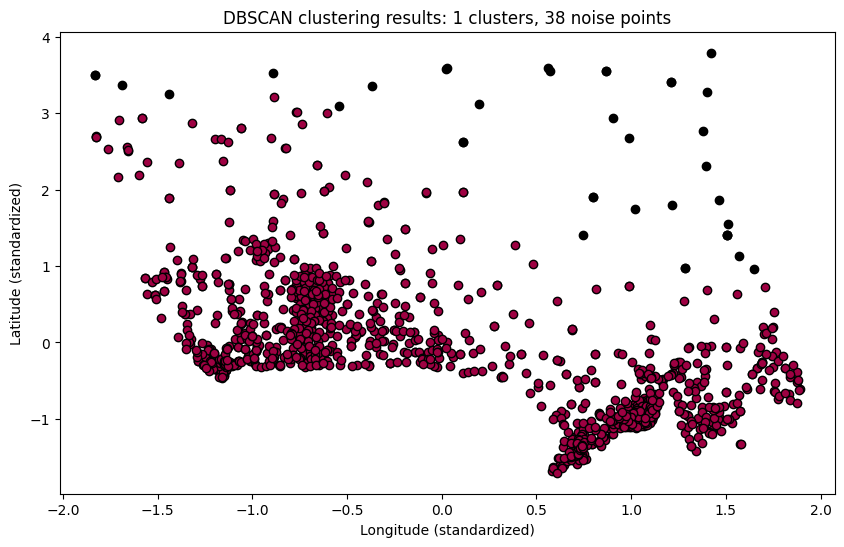

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Get the labels (cluster assignments)
labels = db.labels_

# Add the cluster labels to the original DataFrame
pdf["Cluster"] = labels

# Number of clusters in the labels, ignoring noise if present (-1 represents noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = clust_ds[class_member_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6
    )

plt.title(f"DBSCAN clustering results: {n_clusters} clusters, {n_noise} noise points")
plt.xlabel("Longitude (standardized)")
plt.ylabel("Latitude (standardized)")
plt.show()
